Samo da vidim Radi li

In [14]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())

def getDevice():
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

device = getDevice()
x = torch.tensor([1.0, 2.0, 3.0]).to(device)
y = x + 2
print(f"Tenzor na ur: {y.device}")
print(f"Retultat: {y}")




2.10.0+cpu
False
Tenzor na ur: cpu
Retultat: tensor([3., 4., 5.])


Linerana funkcija

In [15]:
import torch

SIZE = 100
N = 1000

def getDevice():
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')


device = getDevice()
x = torch.randn(SIZE, 1).to(device)
y = 2 * x - 3 + torch.randn(SIZE, 1).to(device) * .1

model = torch.nn.Linear(1,1).to(device)
krit = torch.nn.MSELoss()
print(krit)
optim = torch.optim.SGD(model.parameters(), lr=.01)

for epoch in range(N):
    outputs = model(x)
    loss = krit(outputs, y)

    optim.zero_grad()
    loss.backward()
    optim.step()

    if (epoch + 1) % 20 == 0:
        print(f"Epoch [{epoch+1}/{N}], Loss {loss.item():-4f}")

k, n = model.parameters()
print(f"Y = {k.item():.2f} x + {n.item():.2f}")





MSELoss()
Epoch [20/1000], Loss 7.496697
Epoch [40/1000], Loss 3.243213
Epoch [60/1000], Loss 1.406982
Epoch [80/1000], Loss 0.613877
Epoch [100/1000], Loss 0.271137
Epoch [120/1000], Loss 0.122939
Epoch [140/1000], Loss 0.058821
Epoch [160/1000], Loss 0.031064
Epoch [180/1000], Loss 0.019039
Epoch [200/1000], Loss 0.013827
Epoch [220/1000], Loss 0.011565
Epoch [240/1000], Loss 0.010584
Epoch [260/1000], Loss 0.010157
Epoch [280/1000], Loss 0.009972
Epoch [300/1000], Loss 0.009891
Epoch [320/1000], Loss 0.009856
Epoch [340/1000], Loss 0.009841
Epoch [360/1000], Loss 0.009834
Epoch [380/1000], Loss 0.009831
Epoch [400/1000], Loss 0.009830
Epoch [420/1000], Loss 0.009829
Epoch [440/1000], Loss 0.009829
Epoch [460/1000], Loss 0.009829
Epoch [480/1000], Loss 0.009829
Epoch [500/1000], Loss 0.009829
Epoch [520/1000], Loss 0.009829
Epoch [540/1000], Loss 0.009829
Epoch [560/1000], Loss 0.009829
Epoch [580/1000], Loss 0.009829
Epoch [600/1000], Loss 0.009829
Epoch [620/1000], Loss 0.009829
Ep

Idemo dalje

In [16]:
import torch
import torch.optim as optim


data = [
    [25, 80],  [30, 20], [25, 30],  [30, 30],
    [45, -10],  [15, 55],  [25, -30], [35, -5],
    [20, 0]
]
tocke = torch.tensor(data)
print(tocke)

# Počinjemo od (0,0), a 'requires_grad=True' kaže PyTorchu da nju optimizira
nova_tocka = torch.tensor([0.0, 0.0], requires_grad=True)

# 3. Optimizator (SGD)
# Learning rate (lr) ovdje može biti veći jer je problem jednostavan
optimizer = optim.SGD([nova_tocka], lr=0.1)

# 4. Trening petlja
for i in range(500):
    # Izračunaj udaljenost od nove točke do svih 20 točaka (Euklidska udaljenost)
    # Formula: sqrt((x2-x1)^2 + (y2-y1)^2)
    udaljenosti = torch.norm(tocke - nova_tocka, dim=1)
    zbroj_udaljenosti = torch.sum(udaljenosti)

    # Backpropagation
    optimizer.zero_grad()
    zbroj_udaljenosti.backward()
    optimizer.step()

    if (i + 1) % 100 == 0:
        print(f"Iteracija {i+1}: Trenutni zbroj udaljenosti = {zbroj_udaljenosti.item():.4f}")

print(f"\nOptimalna lokacija nove točke je: {nova_tocka.detach().numpy()}")

tensor([[ 25,  80],
        [ 30,  20],
        [ 25,  30],
        [ 30,  30],
        [ 45, -10],
        [ 15,  55],
        [ 25, -30],
        [ 35,  -5],
        [ 20,   0]])
Iteracija 100: Trenutni zbroj udaljenosti = 255.6109
Iteracija 200: Trenutni zbroj udaljenosti = 251.1134
Iteracija 300: Trenutni zbroj udaljenosti = 251.1187
Iteracija 400: Trenutni zbroj udaljenosti = 251.1231
Iteracija 500: Trenutni zbroj udaljenosti = 251.1289

Optimalna lokacija nove točke je: [29.935505 20.003946]


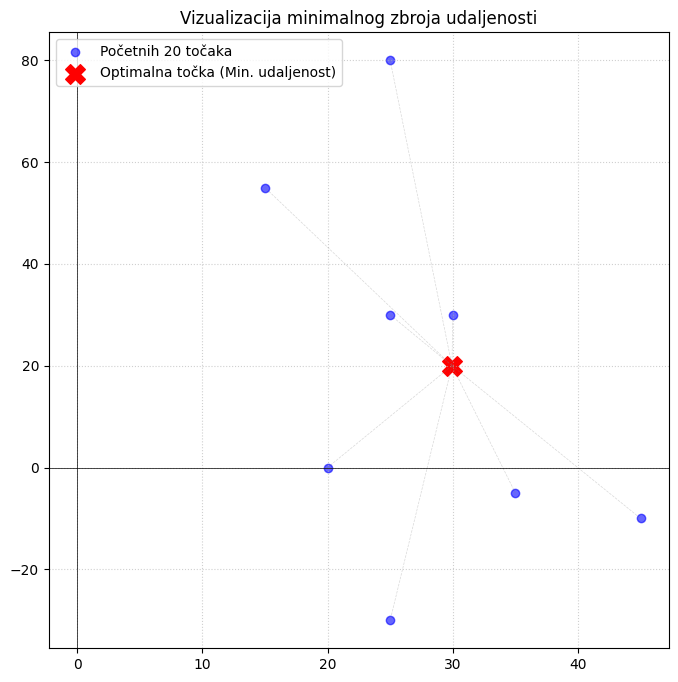

In [17]:
import matplotlib.pyplot as plt

# Prebacivanje tenzora u numpy za crtanje
tocke_np = tocke.numpy()
optimalna_tocka = nova_tocka.detach().numpy()

plt.figure(figsize=(8, 8))

# Crtanje 20 početnih točaka
plt.scatter(tocke_np[:, 0], tocke_np[:, 1], c='blue', label='Početnih 20 točaka', alpha=0.6)

# Crtanje optimalne točke
plt.scatter(optimalna_tocka[0], optimalna_tocka[1], c='red', marker='X', s=200, label='Optimalna točka (Min. udaljenost)')

# Dodatna vizualizacija: linije od optimalne točke do svih ostalih (opcionalno)
for t in tocke_np:
    plt.plot([optimalna_tocka[0], t[0]], [optimalna_tocka[1], t[1]], 'gray', linestyle='--', linewidth=0.5, alpha=0.3)

plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.title("Vizualizacija minimalnog zbroja udaljenosti")
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

Skupina 0: 7 točaka
Skupina 1: 6 točaka
Skupina 2: 5 točaka
Skupina 3: 6 točaka
tensor([[18.7166, 23.1936],
        [38.4535, 97.9407],
        [36.8478, 70.4864],
        [13.6618, 68.5032]], requires_grad=True)


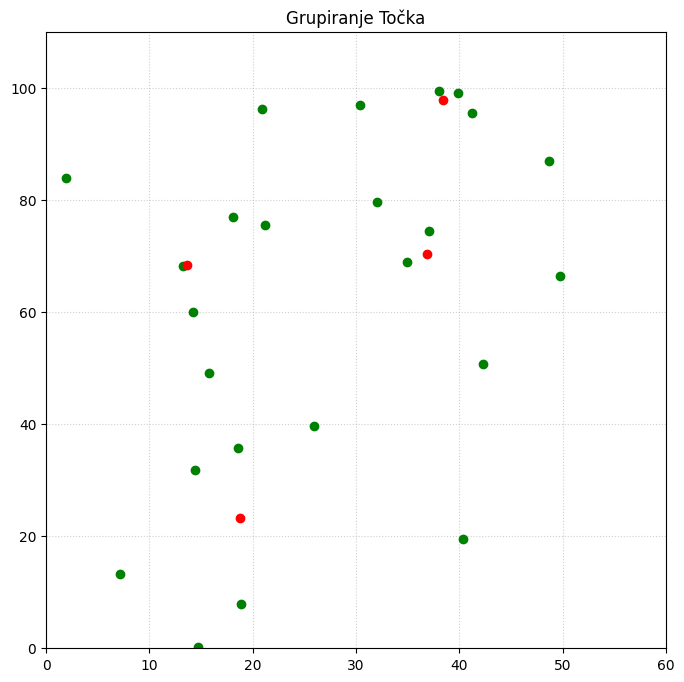

In [1]:
import random
import torch
import matplotlib.pyplot as plt

BROJ_TOCAKA = 24
x_raspon = (0, 50)
y_raspon = (0, 100)

MIN_SIZE = 5
MAX_SIZE = 7

data = [[random.uniform(*x_raspon), random.uniform(*y_raspon)] for _ in range(BROJ_TOCAKA)]
tocke = torch.tensor(data)
#print(tocke)




import torch

# 1. Generiranje podataka
#torch.manual_seed(42)
#tocke = torch.stack([torch.rand(24) * 50, torch.rand(24) * 100], dim=1)

# 2. Inicijalizacija 4 centra (centroida)
centroidi = tocke[torch.randperm(24)[:4]].clone().detach().requires_grad_(True)

optimizer = torch.optim.Adam([centroidi], lr=0.5)

# Parametri ograničenja

for step in range(500):
    optimizer.zero_grad()

    # Izračun euklidske udaljenosti (24, 4)
    dist = torch.cdist(tocke, centroidi)

    # Softmin dodjeljivanje (vjerojatnost pripadnosti točke klasteru)
    # Koristimo temperaturu (npr. 0.1) da dobijemo "oštrije" dodjele
    pripadnost = torch.softmax(-dist / 1.0, dim=1)

    # Izračun trenutne veličine svakog klastera
    velicine_klastera = pripadnost.sum(dim=0)

    # Gubitak 1: Minimizacija udaljenosti (standardni K-Means)
    loss_dist = (pripadnost * dist).sum()

    # Gubitak 2: Kazna za kršenje granica (5-7)
    # Ako je veličina < 5 ili > 7, dodajemo kvadratnu kaznu
    low_penalty = torch.clamp(MIN_SIZE - velicine_klastera, min=0)**2
    high_penalty = torch.clamp(velicine_klastera - MAX_SIZE, min=0)**2
    loss_penalty = (low_penalty + high_penalty).sum() * 50 # Faktor 50 pojačava važnost

    ukupni_loss = loss_dist + loss_penalty
    ukupni_loss.backward()
    optimizer.step()

# Finalno dodjeljivanje točaka najbližem centru
finalne_udaljenosti = torch.cdist(tocke, centroidi)
labele = torch.argmin(finalne_udaljenosti, dim=1)

# Provjera rezultata
for i in range(4):
    broj = (labele == i).sum().item()
    print(f"Skupina {i}: {broj} točaka")

print(centroidi)



plt.figure(figsize=(8, 8))
tocke_g = tocke.numpy()
c_g = centroidi.detach().numpy()

for t in tocke_g:
    plt.plot(t[0], t[1], 'go')

for t in c_g:
    plt.plot(t[0], t[1], 'ro')


plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.title("Grupiranje Točka")
#plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.axis([0, 60, 0, 110])
plt.show()

A sad spektakli

In [11]:
import random
import torch
import matplotlib.pyplot as plt

BROJ_TOCAKA = 1000
X_RASPON = (0, 100)
Y_RASPON = (0, 50)
MIN_CLUSTER = 20
MAX_CLUSTER = 40
NR_CLUSTER = round(BROJ_TOCAKA / (MIN_CLUSTER + MAX_CLUSTER) * 2)
MIDX = round((X_RASPON[0] + X_RASPON[1]) / 2)
MIDY = round((Y_RASPON[0] + Y_RASPON[1]) / 2)
print(f"Broj točaka: {BROJ_TOCAKA}")
print(f"Broj slupina: {NR_CLUSTER}")
print(f"Veličina skupine: {MIN_CLUSTER} - {MAX_CLUSTER}")

data = [[random.uniform(*X_RASPON), random.uniform(*Y_RASPON)] for _ in range(BROJ_TOCAKA)]
tocke = torch.tensor(data)
#print(tocke)

centroidi = tocke[torch.randperm(BROJ_TOCAKA)[:NR_CLUSTER]].clone().detach().requires_grad_(True)
optimizer = torch.optim.Adam([centroidi], lr=0.5)
for step in range(500):
    optimizer.zero_grad()    
    
    # Izračun euklidske udaljenosti
    dist = torch.cdist(tocke, centroidi)
  
    # Softmin dodjeljivanje (vjerojatnost pripadnosti točke klasteru)
    # Koristimo temperaturu (npr. 0.1) da dobijemo "oštrije" dodjele
    pripadnost = torch.softmax(-dist / 1.0, dim=1)
    
    # Izračun trenutne veličine svakog klastera
    velicine_klastera = pripadnost.sum(dim=0)
    
    # Gubitak 1: Minimizacija udaljenosti (standardni K-Means)
    loss_dist = (pripadnost * dist).sum()
    
    # Gubitak 2: Kazna za kršenje granica (5-7)
    # Ako je veličina < 5 ili > 7, dodajemo kvadratnu kaznu
    low_penalty = torch.clamp(MIN_CLUSTER - velicine_klastera, min=0)**2
    high_penalty = torch.clamp(velicine_klastera - MAX_CLUSTER, min=0)**2
    loss_penalty = (low_penalty + high_penalty).sum() * 50 # Faktor 50 pojačava važnost
    
    ukupni_loss = loss_dist + loss_penalty
    ukupni_loss.backward()
    optimizer.step()

# Finalno dodjeljivanje točaka najbližem centru
finalne_udaljenosti = torch.cdist(tocke, centroidi)
labele = torch.argmin(finalne_udaljenosti, dim=1)
#print("Labele", labele)
#print(labele[2].item())

# Provjera rezultata
for i in range(NR_CLUSTER):
    broj = (labele == i).sum().item()
    print(f"Skupina {i}: {broj} točaka")

print("Centroidi:", centroidi)

plt.figure(figsize=(int(12 * X_RASPON[1] - X_RASPON[0]) / (Y_RASPON[1] - Y_RASPON[0]), 12))
tocke_g = tocke.numpy()
centroidi_g = centroidi.detach().numpy()
'''
for ci, c in enumerate(centroidi_g):
  plt.plot(c[0], c[1], 'ro')
  #print(f"Ispisujem centroid {ci}{c}")x11
  for ti, t in enumerate(tocke_g):
    #print(f"P: {labele[ti].item()}=={ci}")
    if labele[ti].item() == ci:
      #print("Našao!!!")
      plt.plot(t[0], t[1], 'go')
      plt.plot([c[0], t[0]], [c[1], t[1]], 'gray', linestyle='--', linewidth=0.5, alpha=0.5)
'''


olt = torch.tensor([float(MIDX), float(MIDY)], requires_grad=True)
optimizer = torch.optim.SGD([olt], lr=0.1)
# Trening petlja
for i in range(500):
    # Izračunaj udaljenost od nove točke do svih 20 točaka (Euklidska udaljenost)
    # Formula: sqrt((x2-x1)^2 + (y2-y1)^2)
    udaljenosti = torch.norm(centroidi - olt, dim=1)
    zbroj_udaljenosti = torch.sum(udaljenosti)

    # Backpropagation
    optimizer.zero_grad()
    zbroj_udaljenosti.backward()
    optimizer.step()

olt_g = olt.detach().numpy()
'''
plt.plot(olt_g[0], olt_g[1], 'bo',markersize=14)
for c in centroidi_g:
  plt.plot([c[0],olt_g[0]], [c[1],olt_g[1]], 'gray', linestyle='--', linewidth=0.7, alpha=0.8)


plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.title("Planiranje Pasivne GPON mreže")
#plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.axis([X_RASPON[0] -2, X_RASPON[1] +2, Y_RASPON[0] -2, Y_RASPON[1] +2])
plt.show()
'''

Broj točaka: 1000
Broj slupina: 33
Veličina skupine: 20 - 40
Skupina 0: 26 točaka
Skupina 1: 31 točaka
Skupina 2: 39 točaka
Skupina 3: 32 točaka
Skupina 4: 30 točaka
Skupina 5: 29 točaka
Skupina 6: 41 točaka
Skupina 7: 28 točaka
Skupina 8: 21 točaka
Skupina 9: 24 točaka
Skupina 10: 40 točaka
Skupina 11: 21 točaka
Skupina 12: 30 točaka
Skupina 13: 20 točaka
Skupina 14: 27 točaka
Skupina 15: 27 točaka
Skupina 16: 23 točaka
Skupina 17: 38 točaka
Skupina 18: 39 točaka
Skupina 19: 37 točaka
Skupina 20: 28 točaka
Skupina 21: 23 točaka
Skupina 22: 20 točaka
Skupina 23: 39 točaka
Skupina 24: 41 točaka
Skupina 25: 33 točaka
Skupina 26: 34 točaka
Skupina 27: 30 točaka
Skupina 28: 37 točaka
Skupina 29: 23 točaka
Skupina 30: 27 točaka
Skupina 31: 24 točaka
Skupina 32: 38 točaka
Centroidi: tensor([[31.6227,  6.2979],
        [90.7935, 15.1289],
        [28.8720, 17.6763],
        [ 6.6513,  6.9876],
        [67.6275, 37.4460],
        [61.8964, 46.6824],
        [43.6803, 25.2962],
        [ 5.4753

'\nplt.plot(olt_g[0], olt_g[1], \'bo\',markersize=14)\nfor c in centroidi_g:\n  plt.plot([c[0],olt_g[0]], [c[1],olt_g[1]], \'gray\', linestyle=\'--\', linewidth=0.7, alpha=0.8)\n\n\nplt.axhline(0, color=\'black\',linewidth=0.5)\nplt.axvline(0, color=\'black\',linewidth=0.5)\nplt.title("Planiranje Pasivne GPON mreže")\n#plt.legend()\nplt.grid(True, linestyle=\':\', alpha=0.6)\nplt.axis([X_RASPON[0] -2, X_RASPON[1] +2, Y_RASPON[0] -2, Y_RASPON[1] +2])\nplt.show()\n'

<Figure size 2400x1200 with 0 Axes>

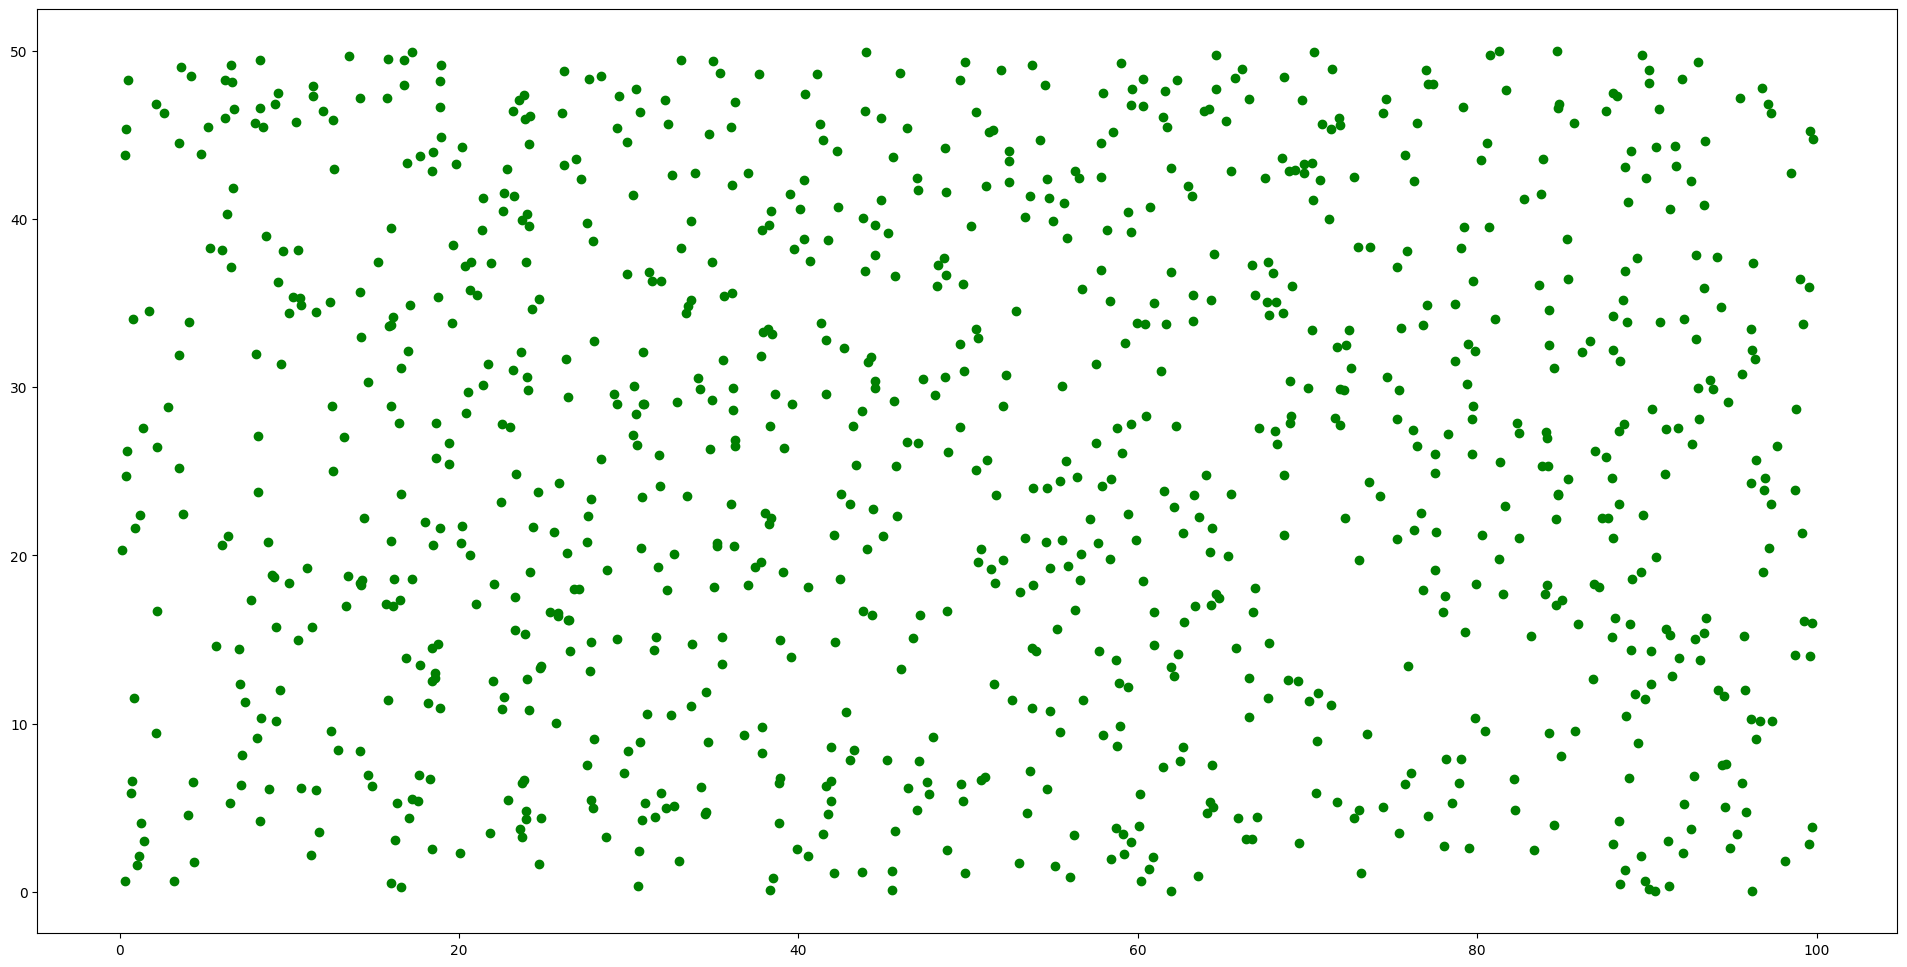

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(int(12 * X_RASPON[1] - X_RASPON[0]) / (Y_RASPON[1] - Y_RASPON[0]), 12))
tocke_g = tocke.numpy()
centroidi_g = centroidi.detach().numpy()

for ci, c in enumerate(centroidi_g):
  #plt.plot(c[0], c[1], 'ro')
  for ti, t in enumerate(tocke_g):
    if labele[ti].item() == ci:
      plt.plot(t[0], t[1], 'go')
      #plt.plot([c[0], t[0]], [c[1], t[1]], 'gray', linestyle='--', linewidth=0.5, alpha=0.5)

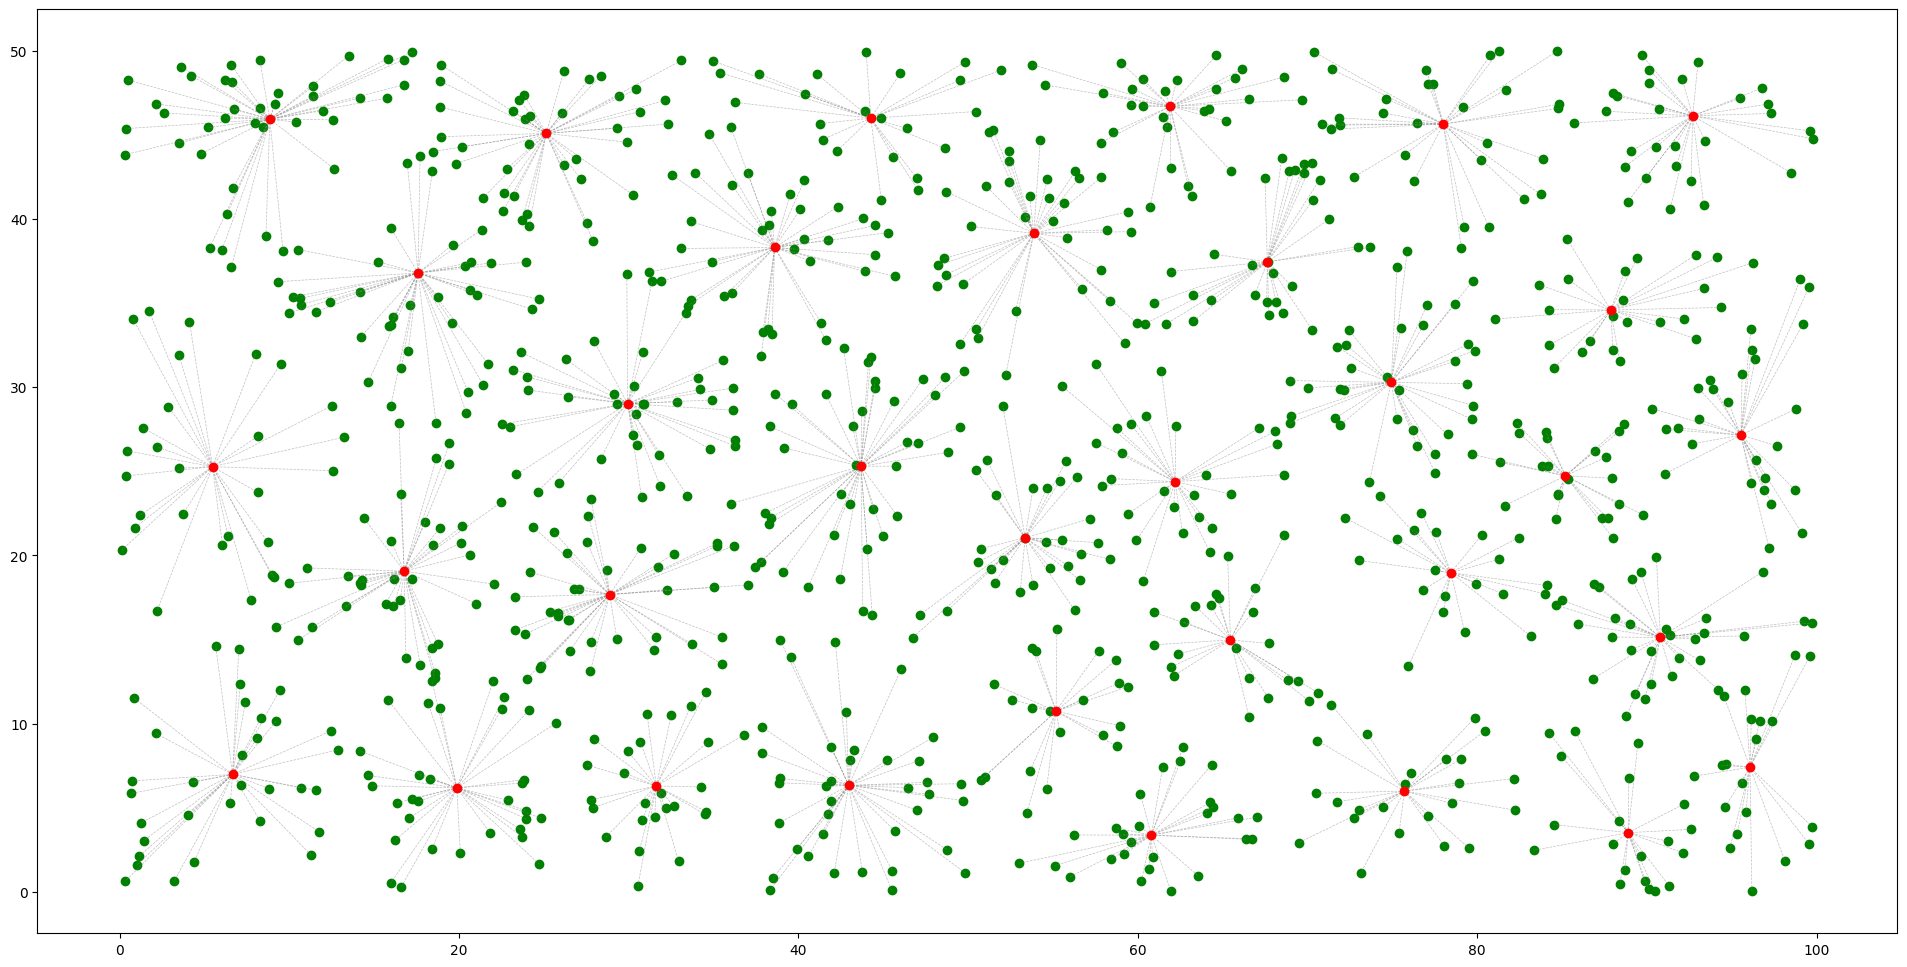

In [13]:
plt.figure(figsize=(int(12 * X_RASPON[1] - X_RASPON[0]) / (Y_RASPON[1] - Y_RASPON[0]), 12))
tocke_g = tocke.numpy()
centroidi_g = centroidi.detach().numpy()

for ci, c in enumerate(centroidi_g):
  for ti, t in enumerate(tocke_g):
    if labele[ti].item() == ci:
      plt.plot(t[0], t[1], 'go')
      plt.plot([c[0], t[0]], [c[1], t[1]], 'gray', linestyle='--', linewidth=0.5, alpha=0.5)
  plt.plot(c[0], c[1], 'ro')

(np.float64(-2.0), np.float64(102.0), np.float64(-2.0), np.float64(52.0))

<Figure size 2400x1200 with 0 Axes>

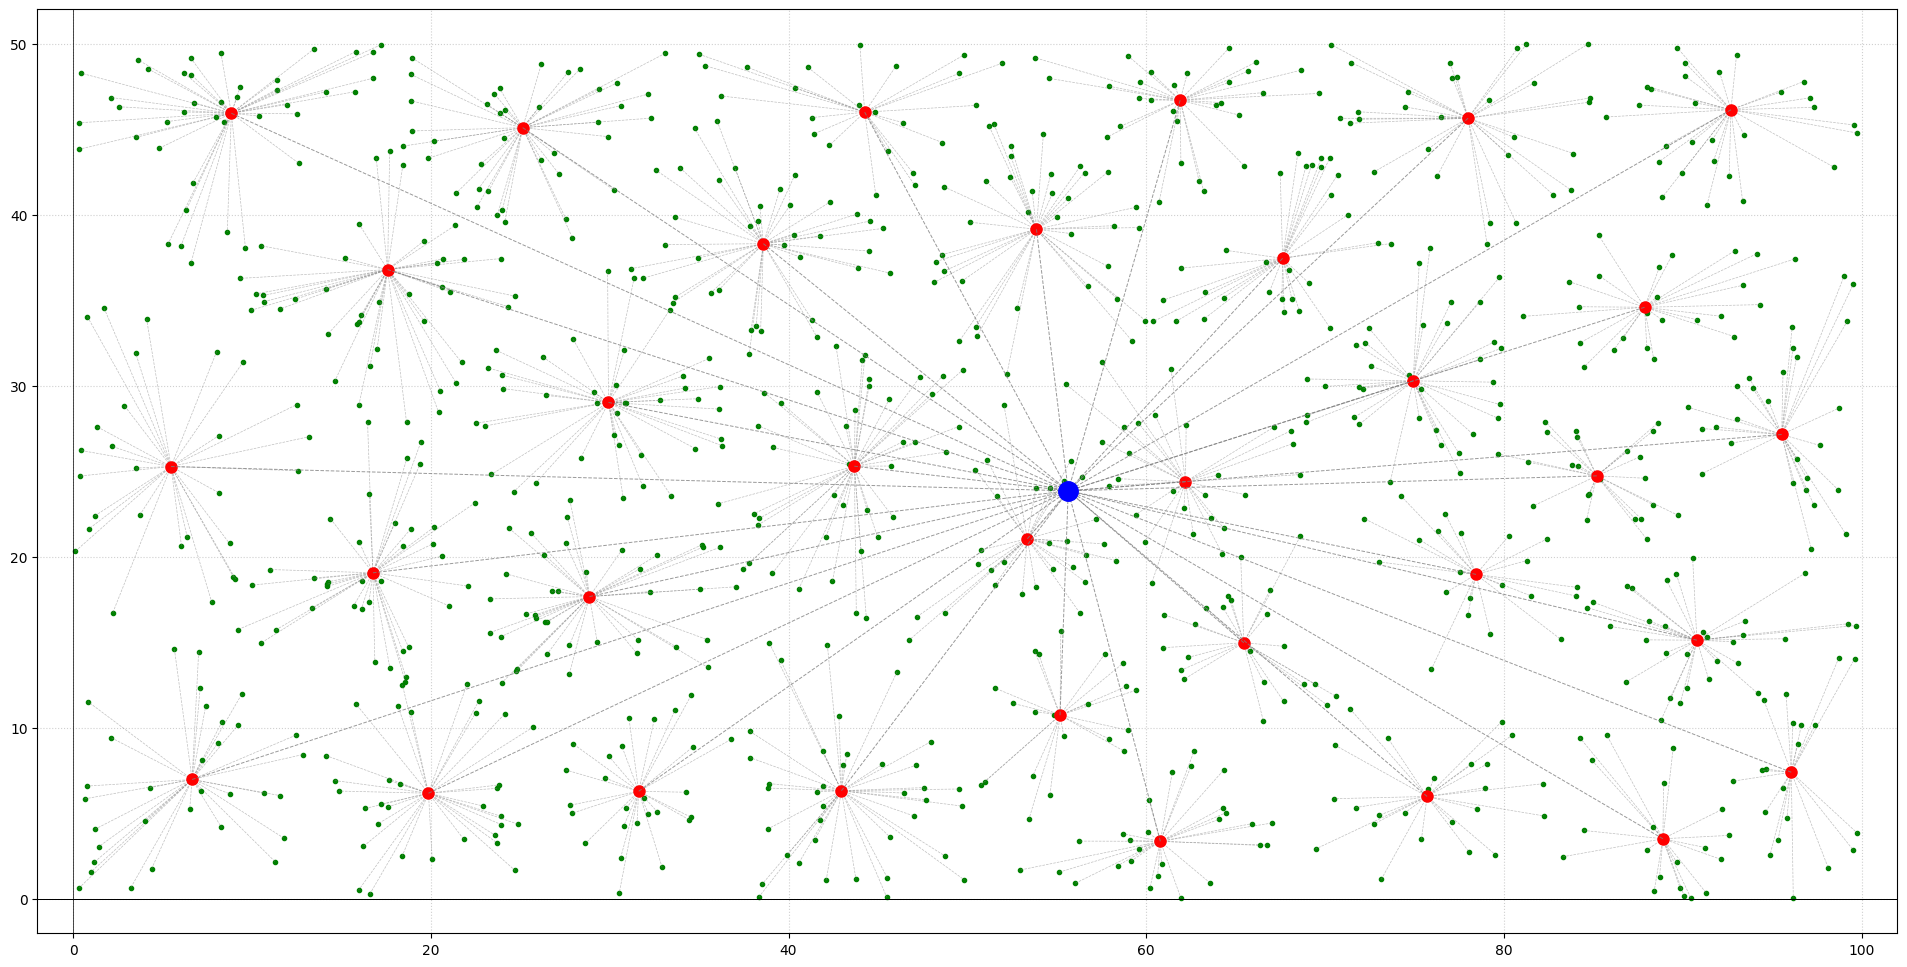

In [14]:
plt.figure(figsize=(int(12 * X_RASPON[1] - X_RASPON[0]) / (Y_RASPON[1] - Y_RASPON[0]), 12))

plt.figure(figsize=(int(12 * X_RASPON[1] - X_RASPON[0]) / (Y_RASPON[1] - Y_RASPON[0]), 12))
tocke_g = tocke.numpy()
centroidi_g = centroidi.detach().numpy()

for ci, c in enumerate(centroidi_g):
  for ti, t in enumerate(tocke_g):
    if labele[ti].item() == ci:
      plt.plot(t[0], t[1], 'go', markersize=3)
      plt.plot([c[0], t[0]], [c[1], t[1]], 'gray', linestyle='--', linewidth=0.5, alpha=0.5)
  plt.plot(c[0], c[1], 'ro', markersize=8)

for c in centroidi_g:
  plt.plot([c[0],olt_g[0]], [c[1],olt_g[1]], 'gray', linestyle='--', linewidth=0.7, alpha=0.8)
  plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.plot(olt_g[0], olt_g[1], 'bo', markersize=14)
#plt.title("Planiranje Pasivne GPON mreže")
#plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.axis([X_RASPON[0] -2, X_RASPON[1] +2, Y_RASPON[0] -2, Y_RASPON[1] +2])
#plt.show()